In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from math import sqrt
import statistics
from scipy import stats

#
import matplotlib as mpl
import csv

#
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
color = sns.color_palette()
import re
from numpy import percentile
#sklearn modules for Model Selection:


In [2]:
df = pd.read_csv("BankChurners.csv") 

In [3]:
path = "BankChurners.csv"
#Ищем все Unknown параметры
df = pd.read_csv(path, na_values = "Unknown")

In [4]:
#Находим количество null в каждом из столбцов
df.isnull().sum()

CLIENTNUM                                                                                                                                0
Attrition_Flag                                                                                                                           0
Customer_Age                                                                                                                             0
Gender                                                                                                                                   0
Dependent_count                                                                                                                          0
Education_Level                                                                                                                       1519
Marital_Status                                                                                                                         749
Income_Category            

In [5]:
marital_status = df['Marital_Status'].value_counts().to_list()
marital_probability = []
marital_sum = sum(marital_status)
for i in marital_status:
    marital_probability.append(i/marital_sum)
    
education_level = df['Education_Level'].value_counts().to_list()
education_probability = []
education_sum = sum(education_level)
for i in education_level:
    education_probability.append(i/education_sum)
    
income_category = df['Income_Category'].value_counts().to_list()
income_probability = []
income_sum = sum(income_category)
for i in income_category:
    income_probability.append(i/income_sum)

In [6]:
status = ['Married','Single','Divorced']
school = ['Graduate','High School','Uneducated','College','Post-Graduate','Doctorate']
money  = ['Less than $40K','$40K - $60K','$80K - $120K','$60K - $80K','$120K +']

for i,num in enumerate(df['Education_Level']):
    if type(num) == float :
        arr = np.random.choice(school,1, p=[education_probability[0], education_probability[1],education_probability[2],education_probability[3], education_probability[4],education_probability[5]])
        cell = ''.join(arr)
        df.at[i, 'Education_Level'] = cell
        
for i,num in enumerate(df['Marital_Status']):
    if type(num) == float :
        arr = np.random.choice(status, 1, p=[marital_probability[0],marital_probability[1],marital_probability[2]])
        cell = ''.join(arr)
        df.at[i, 'Marital_Status'] = cell
        
for i,num in enumerate(df['Income_Category']):
    if type(num) == float :
        arr = np.random.choice(money, 1, p=[income_probability[0], income_probability[1],income_probability[2],income_probability[3],income_probability[4]])
        cell = ''.join(arr)
        df.at[i, 'Income_Category'] = cell

In [7]:
##Значение null убрались
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [8]:
#Значение null убрались
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [9]:
#conversions
for i,num in enumerate(df['Income_Category']):
    if num == "Less than $40K":
        string = ''.join("40000")
for i,num in enumerate(df['Income_Category']):
    number_list = re.findall(r"\d+",num)
    df.at[i, 'Income_Category'] = int(max(number_list))*1000
    
pd.to_numeric(df['Income_Category'], errors ='coerce')

0        80000
1        40000
2        80000
3        40000
4        80000
         ...  
10122    60000
10123    60000
10124    40000
10125    60000
10126    40000
Name: Income_Category, Length: 10127, dtype: int64

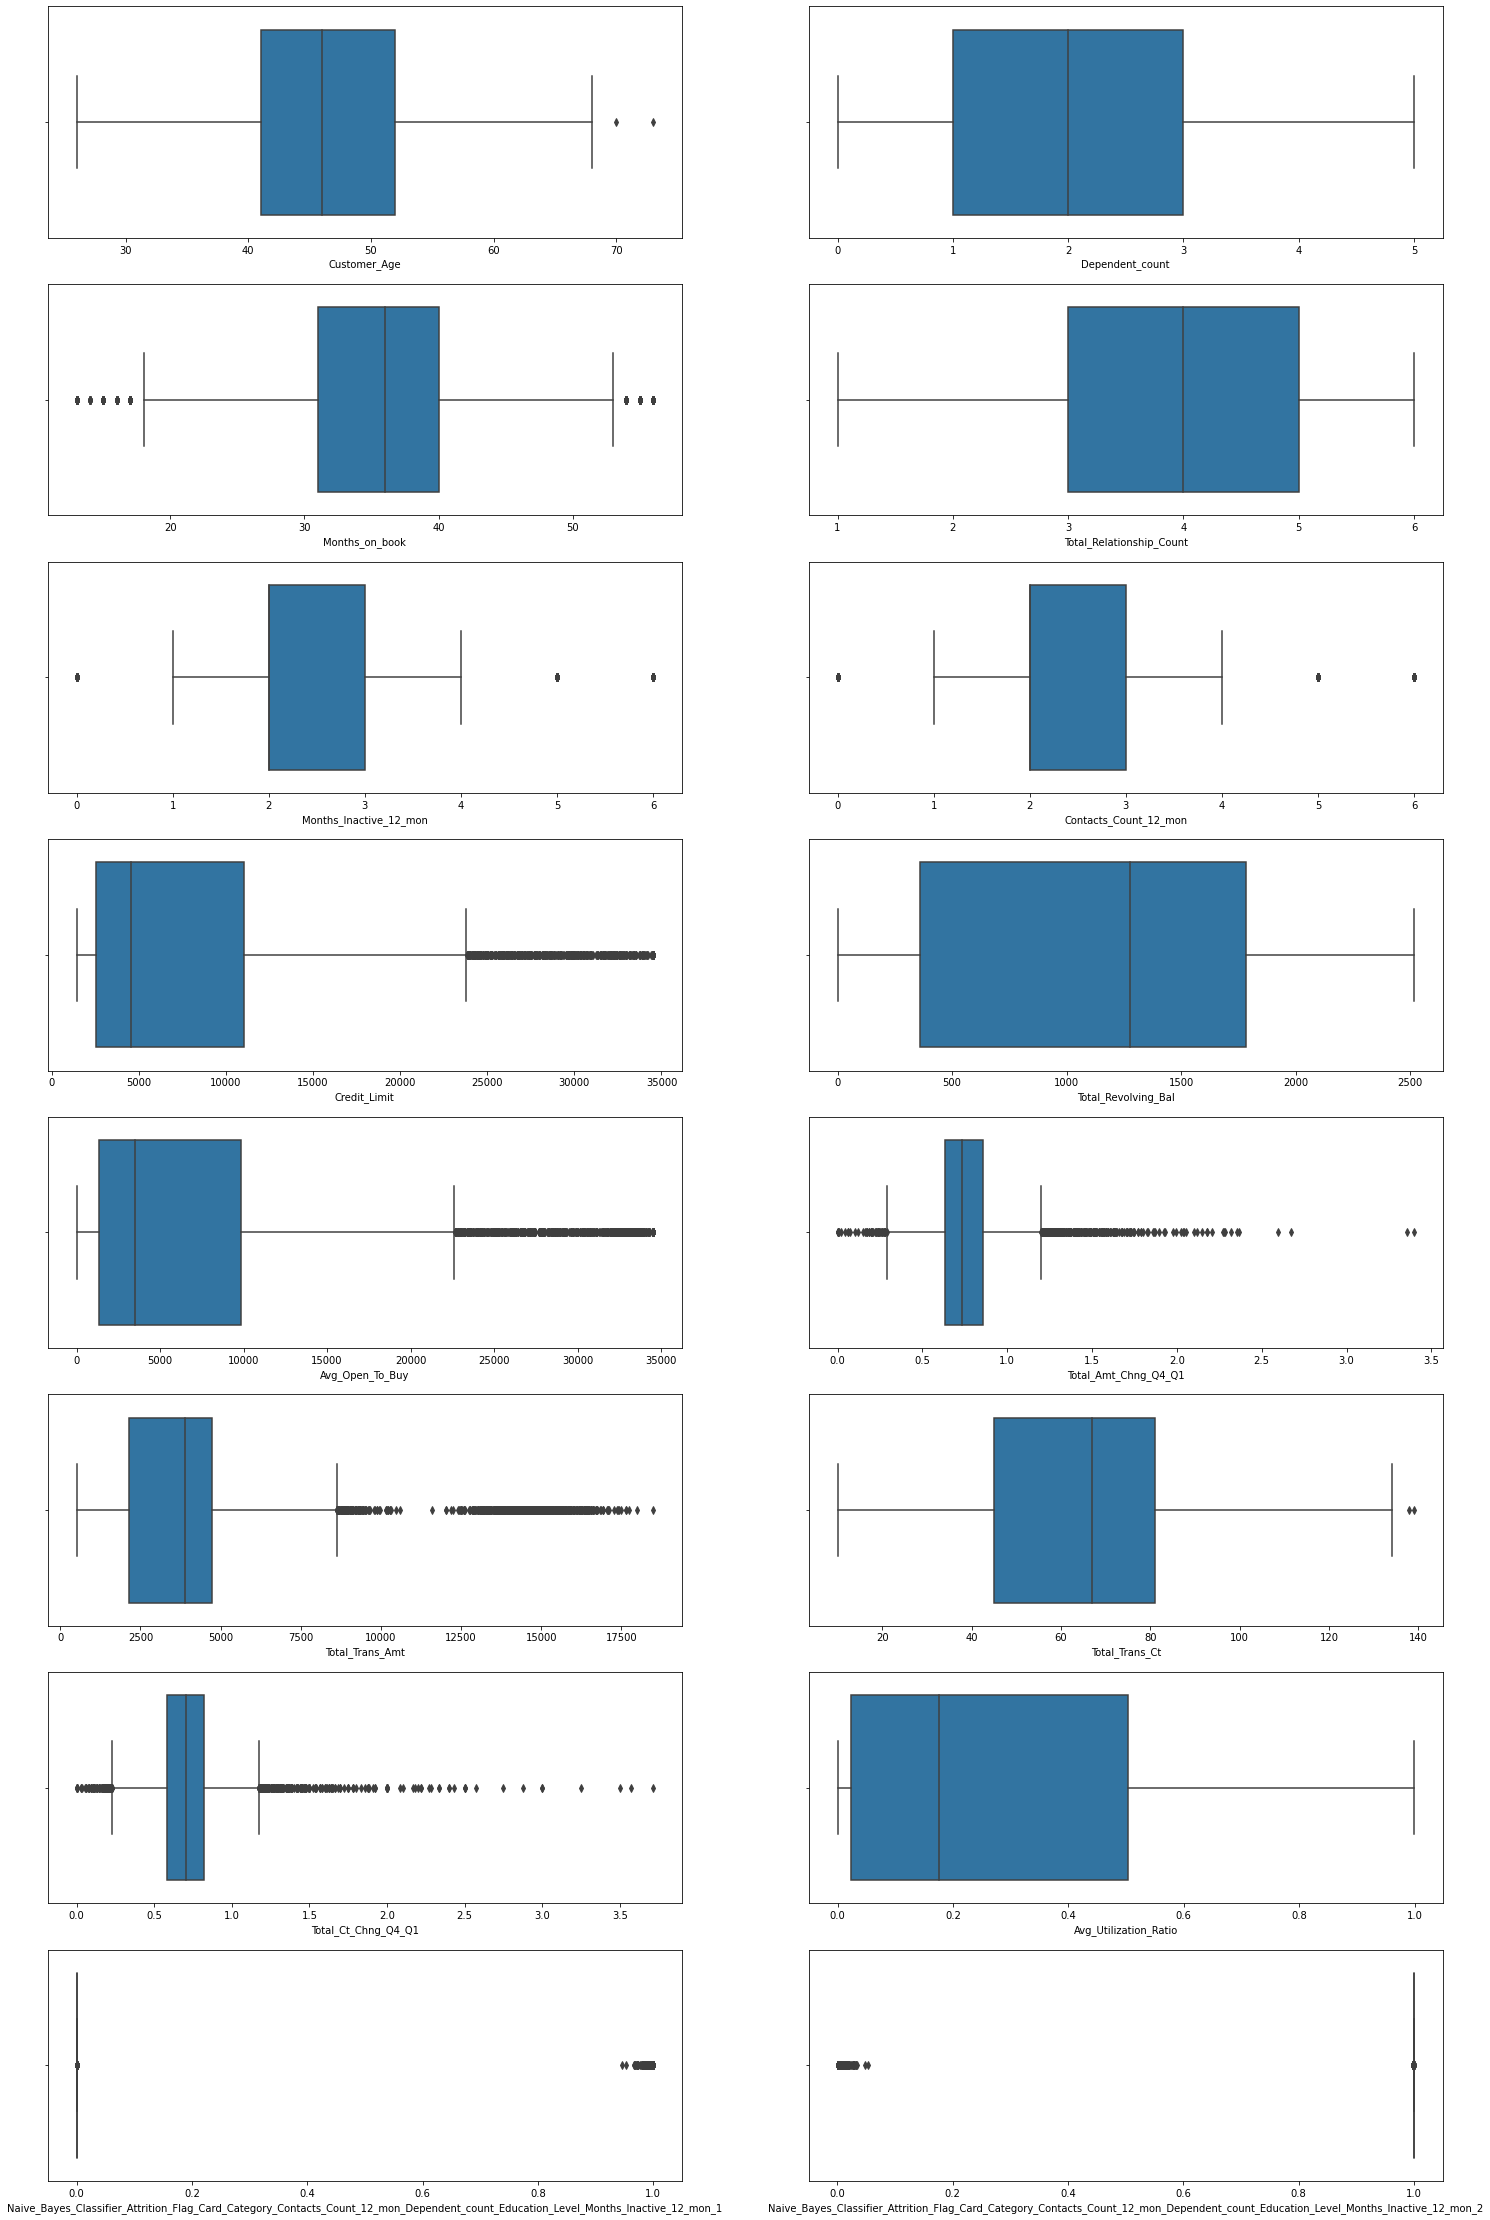

In [10]:
#boxplot, outliers 
fig, axs = plt.subplots(8, 2, figsize=(25,40))
axes = [item for sublist in axs for item in sublist]
j=0

for i in (2, 4) + tuple(range(9, 23)):
    sns.boxplot(data=df, x=df.columns[i], ax = axes[j])
    j+=1
plt.show()

In [11]:
#remove outliers
names = list(df.columns)
for i in names:
    try:
        z=np.abs(stats.zscore(df[i]))
        print(z)
        df=df[(z< 3)]
    except AttributeError:
        pass
    except TypeError:
        pass

[0.8028781  2.15686101 0.68276854 ... 0.61437177 0.58995843 0.67314507]
[0.16540558 0.33357038 0.58305837 ... 0.29014957 2.03656544 0.41489356]
[0.50324598 2.04324865 0.50324598 ... 1.03675668 0.26675535 0.26675535]
[0.38460277 1.01066581 0.00896496 ... 0.00896496 0.00896496 1.36837371]
[0.76400235 1.40735268 0.12065201 ... 0.76400235 0.12065201 1.40735268]
[1.32703397 1.32703397 1.32703397 ... 0.65198606 0.65198606 0.33752396]
[0.49276352 0.41206864 2.22173295 ... 1.39759568 0.49276352 1.39759568]
[0.44604517 0.04186218 0.57410475 ... 0.355069   0.36915066 0.19268539]
[0.47859517 0.37163586 1.43385248 ... 1.43385248 1.43385248 0.97703501]
[0.4888605  0.0086066  0.44578799 ... 0.22675725 0.24083858 0.10525418]
[2.63291796 3.57615482 8.39765194 ... 0.27024701 1.03013778 0.26089607]
[0.96651137 0.95861184 0.98289557 ... 1.70967272 1.1549504  1.71055044]
[0.98528311 1.993654   1.81031384 ... 0.16025238 0.0685823  0.11441734]
[4.05649405 7.18018977 0.61954636 ... 0.49601037 0.07245841 0.24

In [12]:
print('After outliers resolving:',df.shape)

After outliers resolving: (9317, 23)


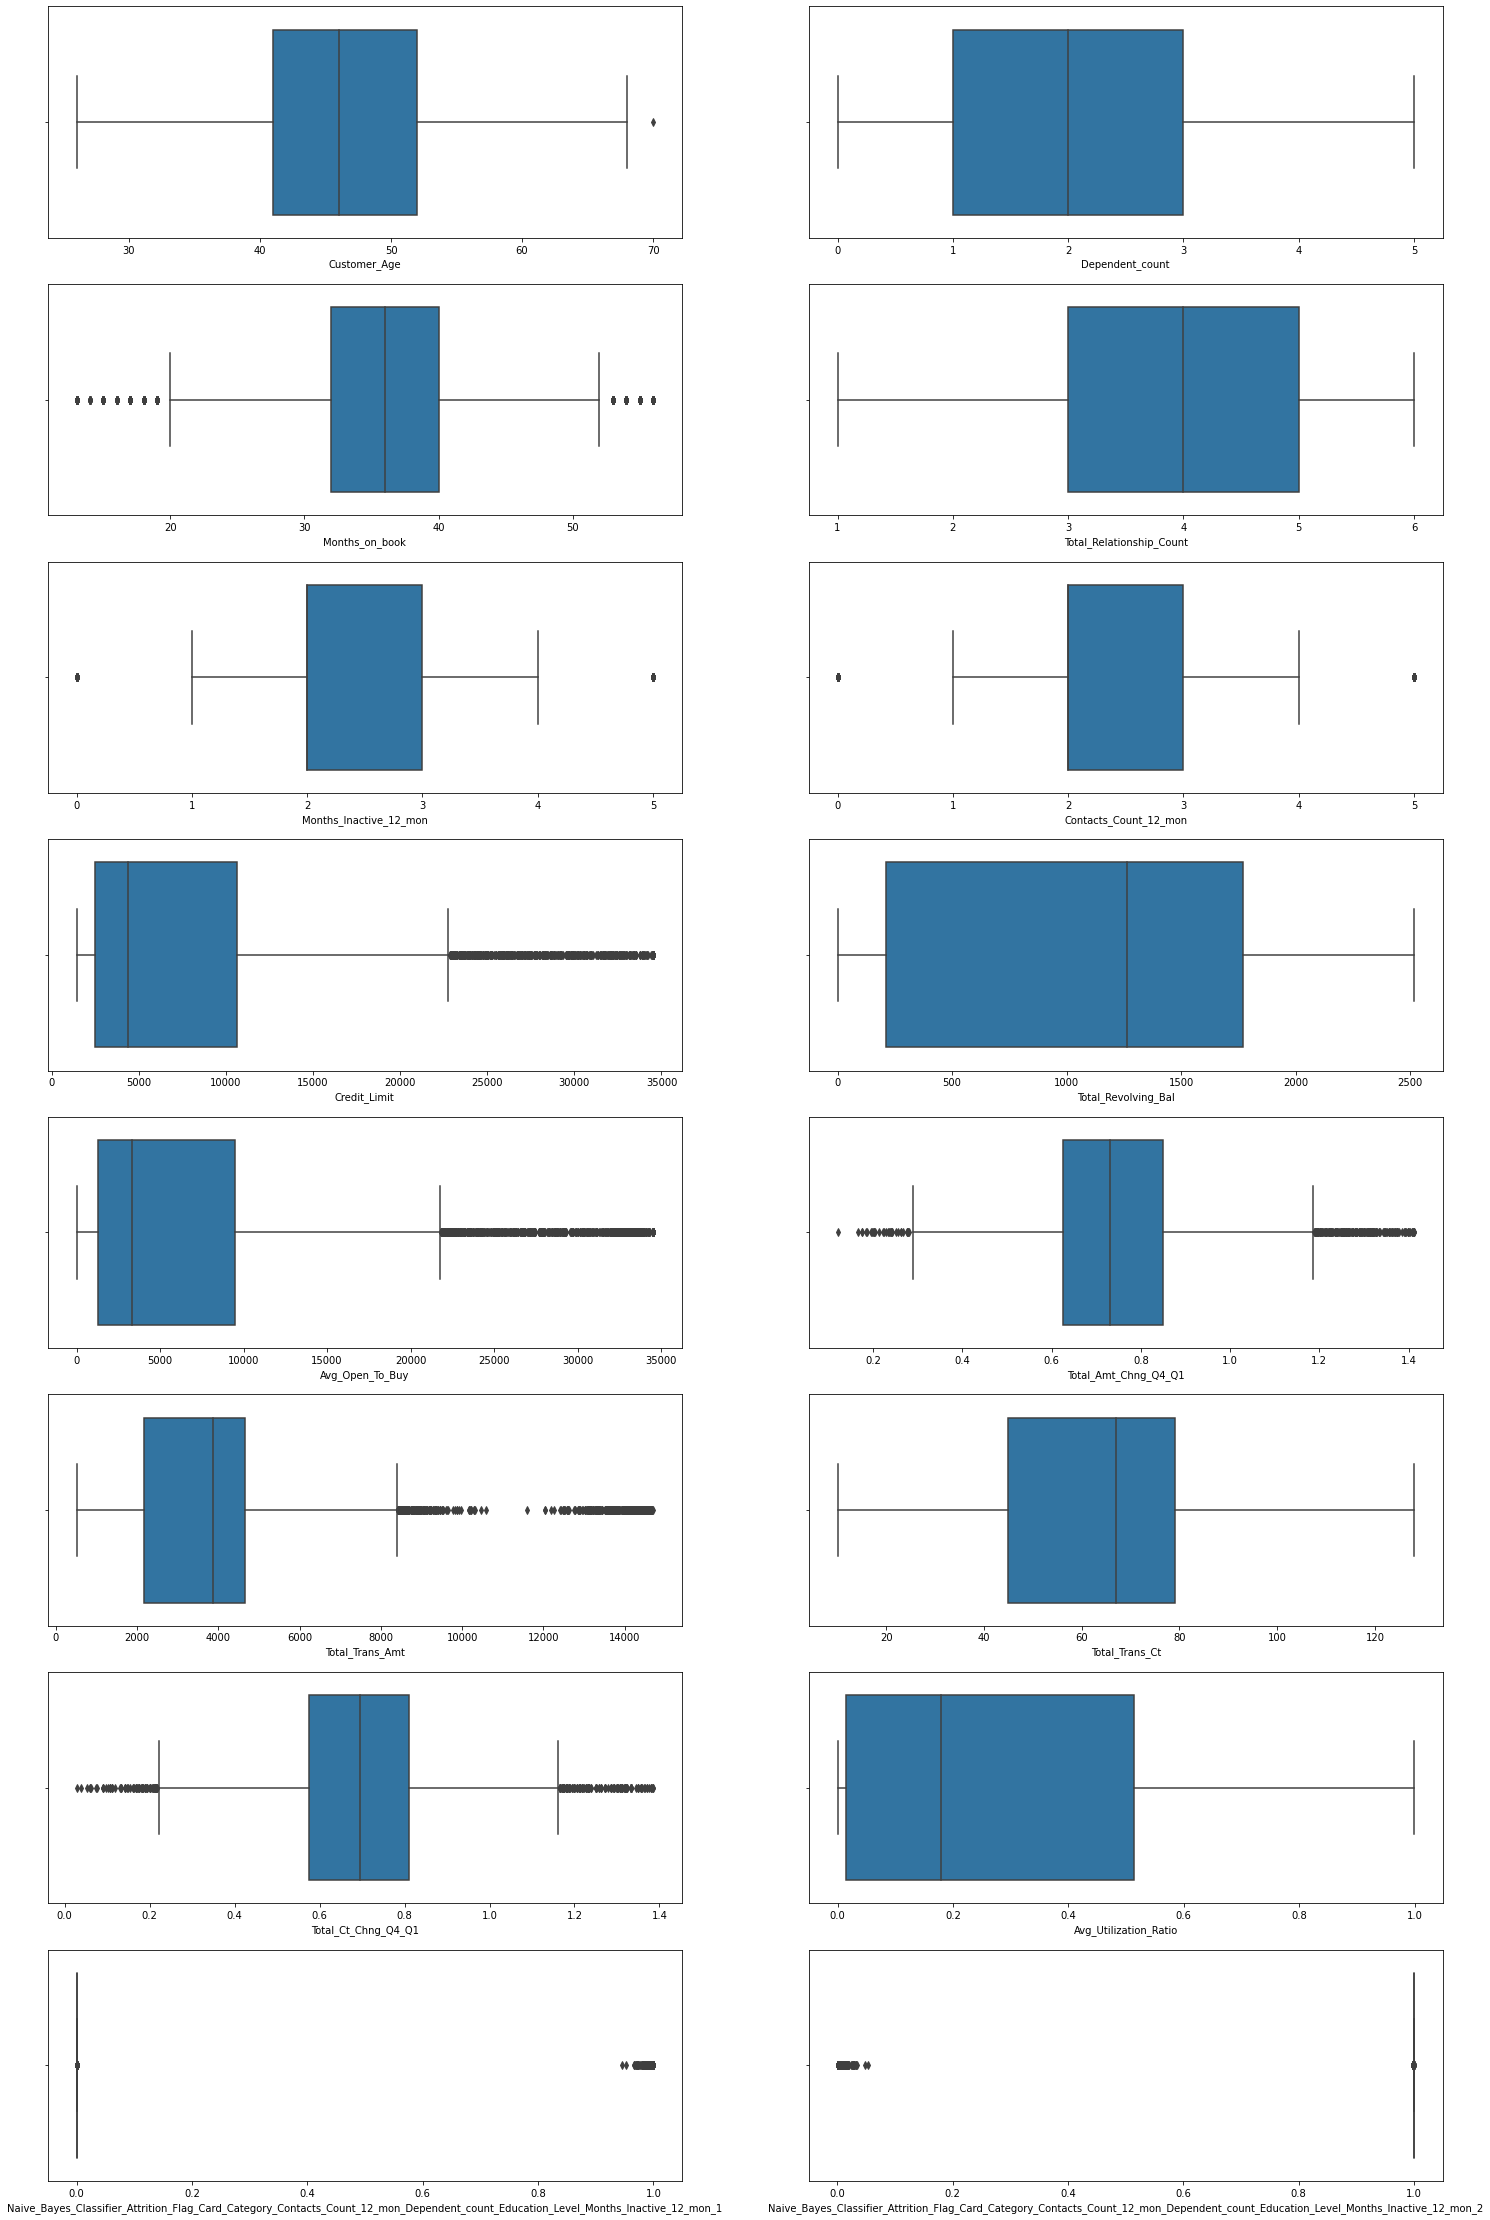

In [13]:
fig, axs = plt.subplots(8, 2, figsize=(25,40))
axes = [item for sublist in axs for item in sublist]
j=0

for i in (2, 4) + tuple(range(9, 23)):
    sns.boxplot(data=df, x=df.columns[i], ax = axes[j])
    j+=1
plt.show()